## MY Model Training

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('./data/gemstone.csv')

In [3]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [4]:
df=df.drop(labels=['id'],axis=1)

In [5]:
#Now separate the features and target variable
# Or say independent and dependent variables
X=df.drop(labels=['price'],axis=1)
Y=df['price']

In [6]:
Y.head()#To check the target variable

0    13619
1    13387
2     2772
3      666
4    14453
Name: price, dtype: int64

In [7]:
X.head()#To check the independent variables

,carat,cut,color,clarity,depth,table,x,y,z
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77


In [8]:
numerical_c=[col for col in X.columns if X[col].dtype!='O']
categorical_c=[col for col in X.columns if X[col].dtype=='O']


In [9]:
numerical_c

['carat', 'depth', 'table', 'x', 'y', 'z']

In [10]:
categorical_c

['cut', 'color', 'clarity']

In [11]:
#Using EDA distribute the custom ranking for each ordinal column
cut_categories = ['Fair', 'Good', 'Very Good','Premium','Ideal']
color_categories = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
clarity_categories = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']

In [12]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer 

In [13]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

car_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal_encoder', OrdinalEncoder(categories=[cut_categories,color_categories,clarity_categories])),
    ('scaler',StandardScaler())
])

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, numerical_c),
    ('car', car_pipeline, categorical_c)
])

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [15]:
X_train_prepared = pd.DataFrame(full_pipeline.fit_transform(X_train), columns=numerical_c+categorical_c)
X_test_prepared = pd.DataFrame(full_pipeline.transform(X_test), columns=numerical_c+categorical_c)

In [16]:
X_train_prepared.head()

,carat,depth,table,x,y,z,cut,color,clarity
0,-0.823144,-1.129988,-0.641897,-0.780451,-0.835103,-0.876024,0.874100,-0.936747,1.350746
1,0.945023,-1.777823,0.921902,1.073226,1.166389,0.946633,-1.137644,0.910853,0.684455
2,1.958484,0.165682,0.400636,1.703116,1.755063,1.742237,-0.131772,0.910853,0.018164
3,-0.995648,-0.574701,-0.641897,-1.122391,-1.161138,-1.165334,0.874100,-0.320880,2.017037
4,-0.995648,0.258230,0.400636,-1.176382,-1.152082,-1.136403,-1.137644,1.526720,-0.648127


In [17]:
## Now we will train the model
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
model = LinearRegression()
model.fit(X_train_prepared, Y_train)


LinearRegression()

In [18]:
model.coef_# To check the coefficients of the model

array([ 6432.97591819,  -132.34206204,   -70.48787525, -1701.38593925,
        -494.17005097,   -76.32351645,    68.80035873,  -464.67990411,
         652.10059539])

In [19]:
model.intercept_# To check the intercept of the model

3976.878738902296

In [20]:
import numpy as np
def evaluate_model(true,predicted):
    r2=r2_score(true,predicted)
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mse)
    return r2,mae,rmse

In [21]:
# Now we will evaluate the model
models={'Linear Regression':LinearRegression(),
        'Lasso':Lasso(),
        'Ridge':Ridge(),
        'ElasticNet':ElasticNet()}
trained_models_list=[]
model_list=[]
r2_score_list=[]
for i in range(len(list(models.keys()))):
    model=models[list(models.keys())[i]]
    model.fit(X_train_prepared,Y_train)
    trained_models_list.append(model)
    model_list.append(list(models.keys())[i])
    r2,mae,rmse=evaluate_model(Y_test,model.predict(X_test_prepared))
    r2_score_list.append(r2)
    #Printing the results
    print(f'{list(models.keys())[i]}')
    print(f'R2 Score: {r2}')
    print(f'Mean Absolute Error: {mae}')
    print(f'Root Mean Squared Error: {rmse}')
    print('------------------------------------')
    


Linear Regression
R2 Score: 0.9362906819996049
Mean Absolute Error: 675.0758270067483
Root Mean Squared Error: 1014.6296630375463
------------------------------------
Lasso
R2 Score: 0.9362869814082755
Mean Absolute Error: 676.2421173665508
Root Mean Squared Error: 1014.659130275064
------------------------------------
Ridge
R2 Score: 0.9362900967491632
Mean Absolute Error: 675.1077629781329
Root Mean Squared Error: 1014.6343233534411
------------------------------------
ElasticNet
R2 Score: 0.8544967219374031
Mean Absolute Error: 1060.9432977143008
Root Mean Squared Error: 1533.3541245902313
------------------------------------


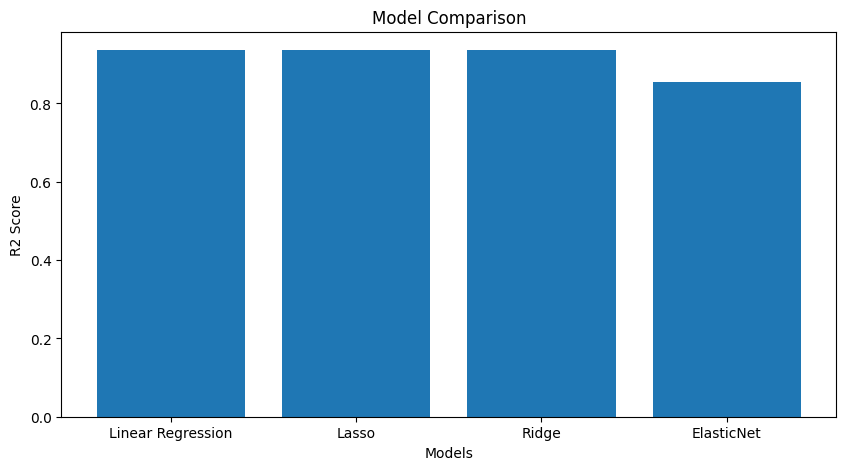

In [22]:
# Now we will plot the results
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.bar(model_list,r2_score_list)
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.title('Model Comparison')
plt.show()


In [23]:
model_list

['Linear Regression', 'Lasso', 'Ridge', 'ElasticNet']